In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN, Flatten, Conv1D, GlobalMaxPooling1D
from keras import optimizers

import os

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Questão 02

### item A)

In [2]:
# Carregamento do csv
df = pd.read_csv('../input/Womens Clothing E-Commerce Reviews.csv',index_col='Unnamed: 0',usecols=['Unnamed: 0','Review Text','Rating'])

In [3]:
# Uma amostra dos dados
df.head(5)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [4]:
# Dimensões do dataset
df.shape

(23486, 2)

In [5]:
# Quantidade de textos
df['Review Text'].shape

(23486,)

In [6]:
# Quantidade de classes existentes no problema
df['Rating'].unique().shape

(5,)

In [7]:
# Classes existentes no problema
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [8]:
df.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [9]:
df = df.dropna(how='any',axis=0)

In [10]:
df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [11]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
y = le.fit_transform(y)

In [14]:
X.shape

(22641,)

In [15]:
y.shape

(22641,)

In [16]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [17]:
y[100]

1

In [18]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [19]:
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [20]:
stop = stopwords.words('english')

In [21]:
def preprocessing(texto):
    texto = preprocessor(texto)
    aux = [w for w in tokenizer_porter(texto) if w not in stop]
    output = ''
    output = output + aux[0]
    for i in aux[1:]:
        output = output + ' ' + i
    return output

In [22]:
for i in range(0,len(X)):
    X[i] = preprocessing(X[i])

In [23]:
X[100]

'fabric felt cheap find flatter top refer wear medium photo measur 38 30 40'

In [24]:
count = CountVectorizer()

In [25]:
bag = count.fit_transform(X)

In [26]:
tfidf = TfidfTransformer()

In [27]:
tf_v = tfidf.fit_transform(bag)

In [28]:
res_a = []
for i in range(0,5):
    print('Texto: ', X[i])
    print('TF-IDF: ', tf_v[i].data)
    print('\n----------------------------------\n')

Texto:  absolut wonder silki sexi comfort
TF-IDF:  [0.39162531 0.44227076 0.56172223 0.51263852 0.2696221 ]

----------------------------------

Texto:  love thi dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit 5 8 love length hit littl knee would definit true midi someon truli petit
TF-IDF:  [0.14006787 0.04852079 0.08122661 0.26711943 0.12560115 0.22068163
 0.15112677 0.12785379 0.17058347 0.49490515 0.18454059 0.19517107
 0.09883138 0.13742185 0.38241549 0.11565722 0.11935315 0.15723491
 0.10802322 0.16758936 0.14110878 0.13332796 0.25216678 0.18618393
 0.21749268]

----------------------------------

Texto:  high hope thi dress realli want work initi order petit small usual size found thi outrag small small fact could zip reorder petit medium wa ok overal top half wa comfort fit nice bottom half veri tight layer sever somewhat cheap net layer imo major design flaw wa net layer sewn directli zipper c
TF-IDF:  [0.0741413  0.06573459 0.05502175

### item B)

In [29]:
X_data = tf_v.toarray()

In [30]:
len(X_data)

22641

In [31]:
X_matrix, X_test, y_matrix, y_test = model_selection.train_test_split(X_data,y,test_size=0.1,random_state=42,stratify=y)

In [32]:
# dados para dividir em treino e validação
X_matrix.shape, y_matrix.shape

((20376, 9781), (20376,))

In [33]:
# dados de teste
X_test.shape, y_test.shape

((2265, 9781), (2265,))

In [34]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_matrix,y_matrix,test_size=0.11115,random_state=42,stratify=y_matrix)

In [35]:
# dados de treino
X_train.shape, y_train.shape

((18111, 9781), (18111,))

In [36]:
# dados de validação
X_val.shape, y_val.shape

((2265, 9781), (2265,))

In [37]:
acc = []
loss = []

In [38]:
model = MLPClassifier(learning_rate_init=0.001,warm_start=True,max_iter=1)

In [39]:
for i in range(40):
    acc_ = model.fit(X_train,y_train).score(X_val,y_val)
    acc.append(acc_)
    loss.append(model.loss_)
    print('acc: {} | loss: {}'.format(acc_,model.loss_))

acc: 0.5545253863134658 | loss: 1.2559771753096918
acc: 0.6286975717439294 | loss: 0.9522760474837864
acc: 0.6335540838852097 | loss: 0.816946144907221
acc: 0.6392935982339956 | loss: 0.7310355238025394
acc: 0.6370860927152318 | loss: 0.6622095652227716
acc: 0.6322295805739514 | loss: 0.6053729886816571
acc: 0.6291390728476821 | loss: 0.5563348581828865
acc: 0.6291390728476821 | loss: 0.5135225159745289
acc: 0.6242825607064018 | loss: 0.47658054901125363
acc: 0.6211920529801325 | loss: 0.4439283724896738
acc: 0.6189845474613687 | loss: 0.4142158094394521
acc: 0.6154525386313465 | loss: 0.3874442166066995
acc: 0.6123620309050772 | loss: 0.3622232480445405
acc: 0.6101545253863134 | loss: 0.3401438970952256
acc: 0.6066225165562914 | loss: 0.3192237547503124
acc: 0.6044150110375276 | loss: 0.299387903395503
acc: 0.601766004415011 | loss: 0.28049933816495776
acc: 0.6026490066225165 | loss: 0.2628932517540596
acc: 0.6022075055187638 | loss: 0.24707960512547095
acc: 0.596467991169978 | loss: 

In [40]:
acc_teste = model.score(X_test,y_test)

In [41]:
print('Acc test: ', acc_teste)

Acc test:  0.5545253863134658


In [42]:
def plotar(v_acc,v_loss,epo):
    acc = v_acc
    loss = v_loss
    epochs = range(1, epo + 1)

    plt.plot(epochs, acc, 'bo', label='Validation acc')
    plt.plot(epochs, loss, 'r', label='Validation loss')
    plt.title('validation acc and loss')
    plt.legend()
    plt.show()

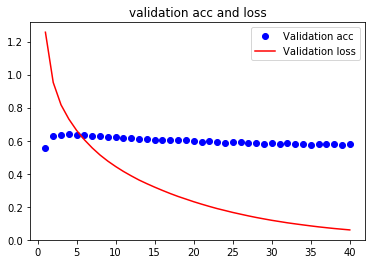

In [43]:
plotar(acc,loss,40)

### item C)

In [44]:
model = Sequential()
model.add(Conv1D(128, 5, input_shape=(9781, 1)))
model.add(Conv1D(64, 5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9777, 128)         768       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9773, 64)          41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 46,277
Trainable params: 46,277
Non-trainable params: 0
_________________________________________________________________


In [45]:
X_train = np.expand_dims(X_train, axis=2) 
X_val = np.expand_dims(X_val, axis=2) 
X_test = np.expand_dims(X_test, axis=2)

In [46]:
X_train.shape

(18111, 9781, 1)

In [47]:
model.compile(optimizer=optimizers.Adamax(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['acc'])

In [48]:
history = model.fit(X_train, y_train, epochs=40, batch_size=128,validation_data=(X_val,y_val))

Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 52s 3ms/step - loss: 1.2904 - acc: 0.5518 - val_loss: 1.2256 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2333 - acc: 0.5539 - val_loss: 1.2240 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2311 - acc: 0.5539 - val_loss: 1.2248 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2299 - acc: 0.5539 - val_loss: 1.2249 - val_acc: 0.5536
Epoch 5/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2287 - acc: 0.5539 - val_loss: 1.2247 - val_acc: 0.5536
Epoch 6/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2286 - acc: 0.5539 - val_loss: 1.2235 - val_acc: 0.5536
Epoch 7/40
18111/18111 [==============================] - 46s 3ms/step - loss: 1.2290 - acc: 0.5539 - val_loss: 1.2234 - val_acc:

In [49]:
loss, acc = model.evaluate(X_test,y_test)
print('Loss: {} | Acc: {}'.format(loss,acc))

2265/2265 [==============================] - 3s 1ms/step
Loss: 1.22285976557279 | Acc: 0.5540838850518199


In [50]:
def plotar(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

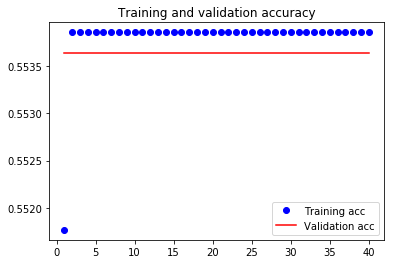

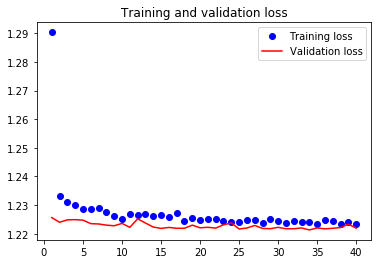

In [51]:
plotar(history)